<a href="https://colab.research.google.com/github/saitejanagula/Wine_Quality_Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECCESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**LOADING WITH DATA SETS AND COMBINING**

In [ ]:
# Load the datasets
red_wine = pd.read_csv('redwine.csv')#, delimiter=';')
white_wine = pd.read_csv('whitewine.csv') #, delimiter=';')

# Add a type column to distinguish between red and white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
dataset = pd.concat([red_wine, white_wine], axis=0)


**CHECKING THE NULL VALUES OR MISSING VALUES**

In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

**INFORMARION OF RED WINE**

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 162.5+ KB


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**INFORMATION OF WHITE WINE**

In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 162.5+ KB


In [ ]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,white
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,white
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,white
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,white
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,white


In [ ]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**COMBINING BOTH DATA SET INTO ONE AND ASSIGNING TO OTHER **

In [ ]:
dataset= pd.concat([red_wine, white_wine], axis=0)

**CHANGING TEXTUAL DATA TO NUM**

In [ ]:
dataset['type'] = dataset['type'].map({'red': 1, 'white': 2})

**TOTAL INFO ABOUT DATASET**

In [ ]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5,2


In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [ ]:
dataset.shape

(3198, 13)

**SPLITING OF DATA SET TO TRAINING AND TESTING**

In [ ]:
X = dataset.drop(['quality', 'type'], axis=1)
y = dataset['quality']

In [ ]:
y = y.apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**SCALARING**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**DISTRIBUTION**

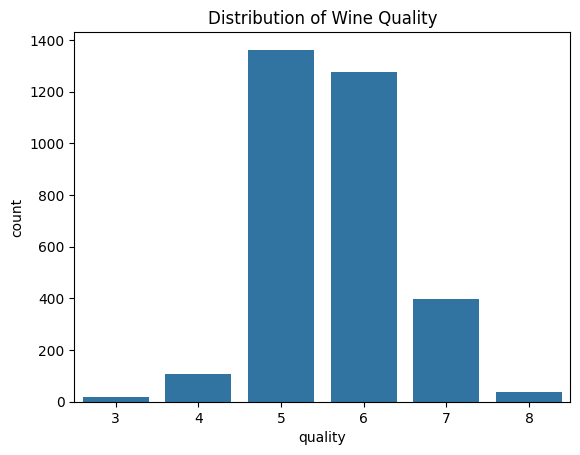

In [ ]:
# Visualize the distribution of quality
sns.countplot(x='quality', data=dataset)
plt.title('Distribution of Wine Quality')
plt.show()


**CORRELATION MATRIX**

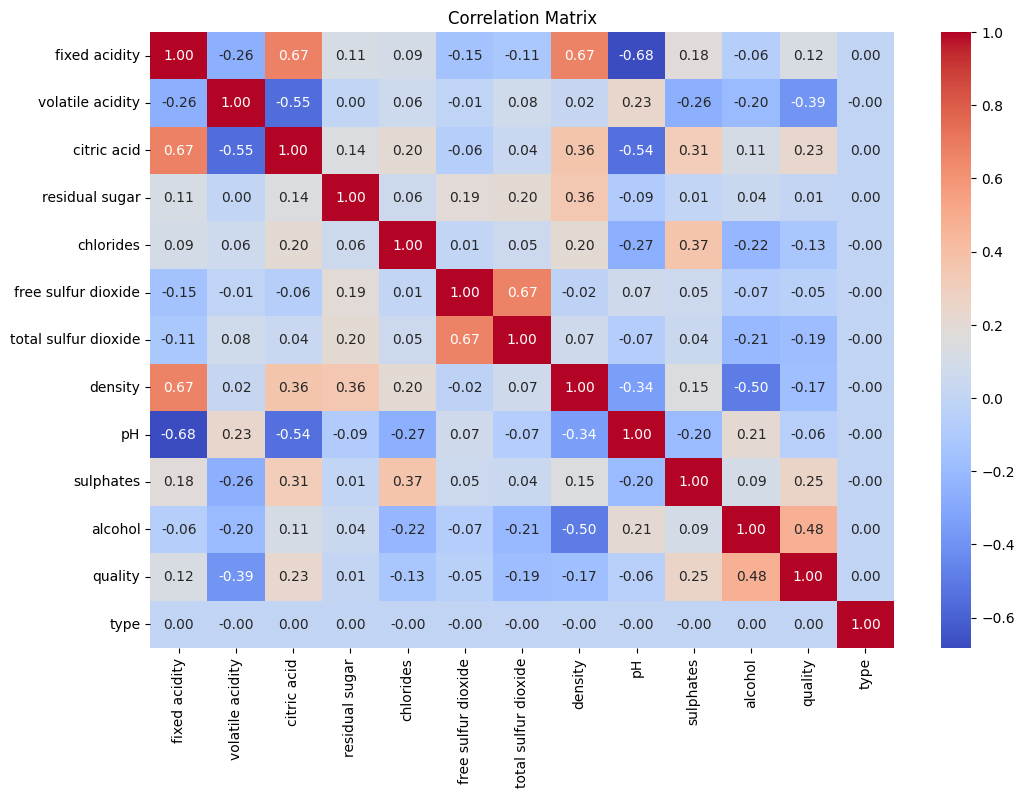

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**APPLYING VARIOUS CLASSIFICATION MODELS**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.884375
Precision: 0.6140350877192983
Recall: 0.40229885057471265
F1-score: 0.48611111111111116
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       553
           1       0.61      0.40      0.49        87

    accuracy                           0.88       640
   macro avg       0.76      0.68      0.71       640
weighted avg       0.87      0.88      0.87       640



In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("svm:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1-score:", f1_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

svm:
Accuracy: 0.896875
Precision: 0.723404255319149
Recall: 0.39080459770114945
F1-score: 0.5074626865671642
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       553
           1       0.72      0.39      0.51        87

    accuracy                           0.90       640
   macro avg       0.82      0.68      0.72       640
weighted avg       0.89      0.90      0.88       640



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("decision tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

decision tree:
Accuracy: 0.978125
Precision: 0.9101123595505618
Recall: 0.9310344827586207
F1-score: 0.9204545454545454
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       553
           1       0.91      0.93      0.92        87

    accuracy                           0.98       640
   macro avg       0.95      0.96      0.95       640
weighted avg       0.98      0.98      0.98       640



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random forest:
Accuracy: 0.9875
Precision: 0.9540229885057471
Recall: 0.9540229885057471
F1-score: 0.9540229885057472
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       553
           1       0.95      0.95      0.95        87

    accuracy                           0.99       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.99      0.99      0.99       640



**COMPARING ALL MODELS**

In [ ]:
# Compare the models based on evaluation metrics
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.884375   0.614035  0.402299  0.486111
1                  SVM  0.896875   0.723404  0.390805  0.507463
2        Decision Tree  0.978125   0.910112  0.931034  0.920455
3        Random Forest  0.987500   0.954023  0.954023  0.954023


**METHODS TO IMPROVE ACCURACY OF MODEL**

In [ ]:
# **1. Hyperparameter Tuning:**
#   - Fine-tune the hyperparameters of the models (Logistic Regression, Decision Tree, Random Forest, SVM) using techniques like GridSearchCV or RandomizedSearchCV to potentially improve their performance.

from sklearn.model_selection import GridSearchCV

# Example for Random Forest:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1-score:", f1_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest:
Accuracy: 0.9875
Precision: 0.9759036144578314
Recall: 0.9310344827586207
F1-score: 0.9529411764705883
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       553
           1       0.98      0.93      0.95        87

    accuracy                           0.99       640
   macro avg       0.98      0.96      0.97       640
weighted avg       0.99      0.99      0.99       640



In [ ]:
# **2. Feature Engineering:**
#   - Explore creating new features or transforming existing ones to potentially improve model performance.
#   - Examples:
#     - Polynomial features (e.g., squaring or cubing certain features)
#     - Interaction terms (e.g., multiplying two features together)

# Example: Creating a new feature 'total_acidity'
dataset['total_acidity'] = dataset['fixed acidity'] + dataset['volatile acidity']
X = dataset.drop(['quality', 'type'], axis=1)
# ... (rest of the model training process)

In [ ]:
# **3. Handling Class Imbalance:**
#   - If the dataset has a significant imbalance between the classes (good vs. bad quality wine), consider techniques like:
#     - Oversampling the minority class (e.g., using SMOTE)
#     - Undersampling the majority class
#     - Using class weights in the models

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# ... (train models on resampled data)

**APPLYING ENSEMBLE METHODS LIKE XGBOOST AND LIGHTGBM**

In [ ]:
# **4. Ensemble Methods (Advanced):**
#   - Explore more advanced ensemble methods like Gradient Boosting (XGBoost, LightGBM) or Stacking to potentially achieve better performance.

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("precision: ", precision_score(y_test, y_pred_xgb))
print("recall: ", recall_score(y_test, y_pred_xgb))
print("f1-score: ", f1_score(y_test, y_pred_xgb))


# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("precision: ", precision_score(y_test, y_pred_lgbm))
print("recall: ", recall_score(y_test, y_pred_lgbm))
print("f1-score: ", f1_score(y_test, y_pred_lgbm))
# Gradient Boosting
# ... (other metrics)


XGBoost:
Accuracy: 0.984375
precision:  0.9325842696629213
recall:  0.9540229885057471
f1-score:  0.9431818181818182
[LightGBM] [Info] Number of positive: 347, number of negative: 2211
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 2558, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.135653 -> initscore=-1.851875
[LightGBM] [Info] Start training from score -1.851875
LightGBM:
Accuracy: 0.99375
precision:  0.9770114942528736
recall:  0.9770114942528736
f1-score:  0.9770114942528736


**CROSS VALIDATION**

In [ ]:
# **5. Cross-Validation:**
#   - Use more robust cross-validation techniques (e.g., k-fold cross-validation) to get a more reliable estimate of model performance.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)  # Example with Random Forest
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


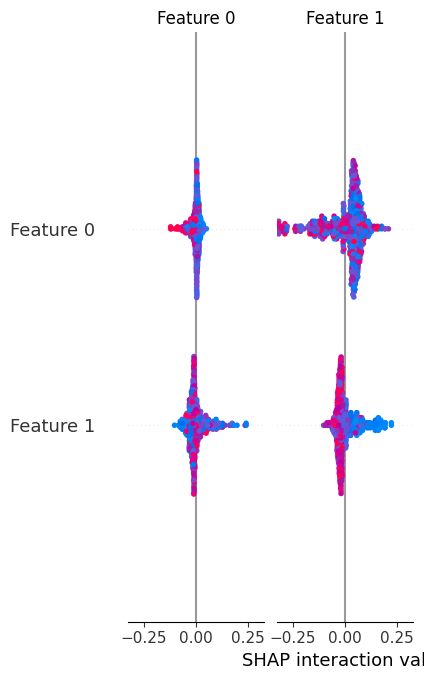

In [ ]:
# **6. Model Interpretability:**
#   - If understanding the reasons behind model predictions is important, consider using techniques like SHAP values or LIME to explain feature importance and how they contribute to predictions.
!pip install shap
import shap

# Example with Random Forest:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

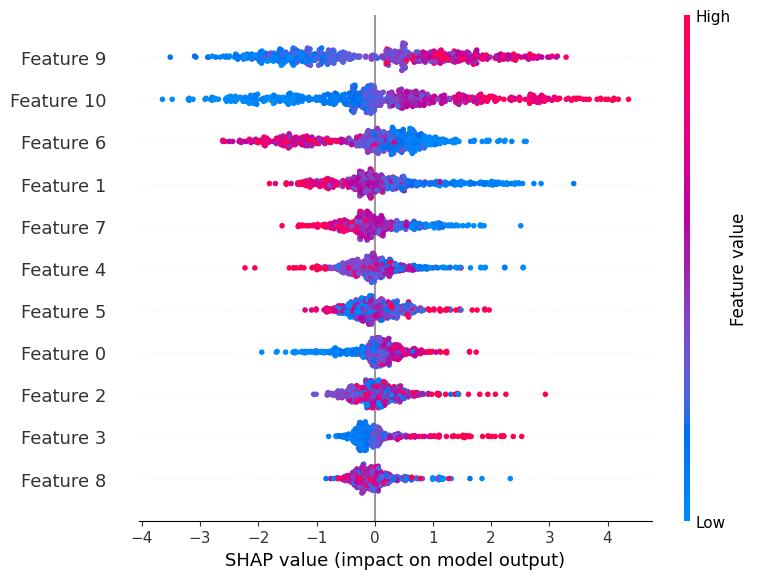

In [ ]:
#example with lightGBM
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)